1. Analyze
2. Preprocess data
3. Feature Engineering
4. Build Model Pipeline
5. Measure performance of the model.
6. Which metric is your main metric for this problem and why? What is your main model as well as their params and why? Your comment


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable.
3. Data Analysis is correct or make sense
4. The data preprocessing is correct or make sense
5. The Feature engineering is correct or make sense
6. Model pipeline
7. Any other additional process will be considered a small plus point.

Churn rate is a marketing metric that describes the number of customers who leave a business over a specific time period. Every user is assigned a prediction value that estimates their state of churn at any given time. This value is based on:

User demographic information
Browsing behavior
Historical purchase data among other information
It factors in our unique and proprietary predictions of how long a user will remain a customer. This score is updated every day for all users who have a minimum of one conversion. The values assigned are between 1 and 5.

## Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from google.colab import drive

#drive.mount("/content/drive")

In [2]:
PATH = "credit_fraud.csv" # Path to your file

df = pd.read_csv(PATH)
print(df.head())

   Unnamed: 0       ID GENDER CAR REALITY  NO_OF_CHILD    INCOME  \
0           0  5008806      M   Y       Y            0  112500.0   
1           1  5008808      F   N       Y            0  270000.0   
2           2  5008809      F   N       Y            0  270000.0   
3           3  5008810      F   N       Y            0  270000.0   
4           4  5008811      F   N       Y            0  270000.0   

            INCOME_TYPE                 EDUCATION_TYPE           FAMILY_TYPE  \
0               Working  Secondary / secondary special               Married   
1  Commercial associate  Secondary / secondary special  Single / not married   
2  Commercial associate  Secondary / secondary special  Single / not married   
3  Commercial associate  Secondary / secondary special  Single / not married   
4  Commercial associate  Secondary / secondary special  Single / not married   

          HOUSE_TYPE  FLAG_MOBIL  WORK_PHONE  PHONE  E_MAIL  FAMILY SIZE  \
0  House / apartment           1  

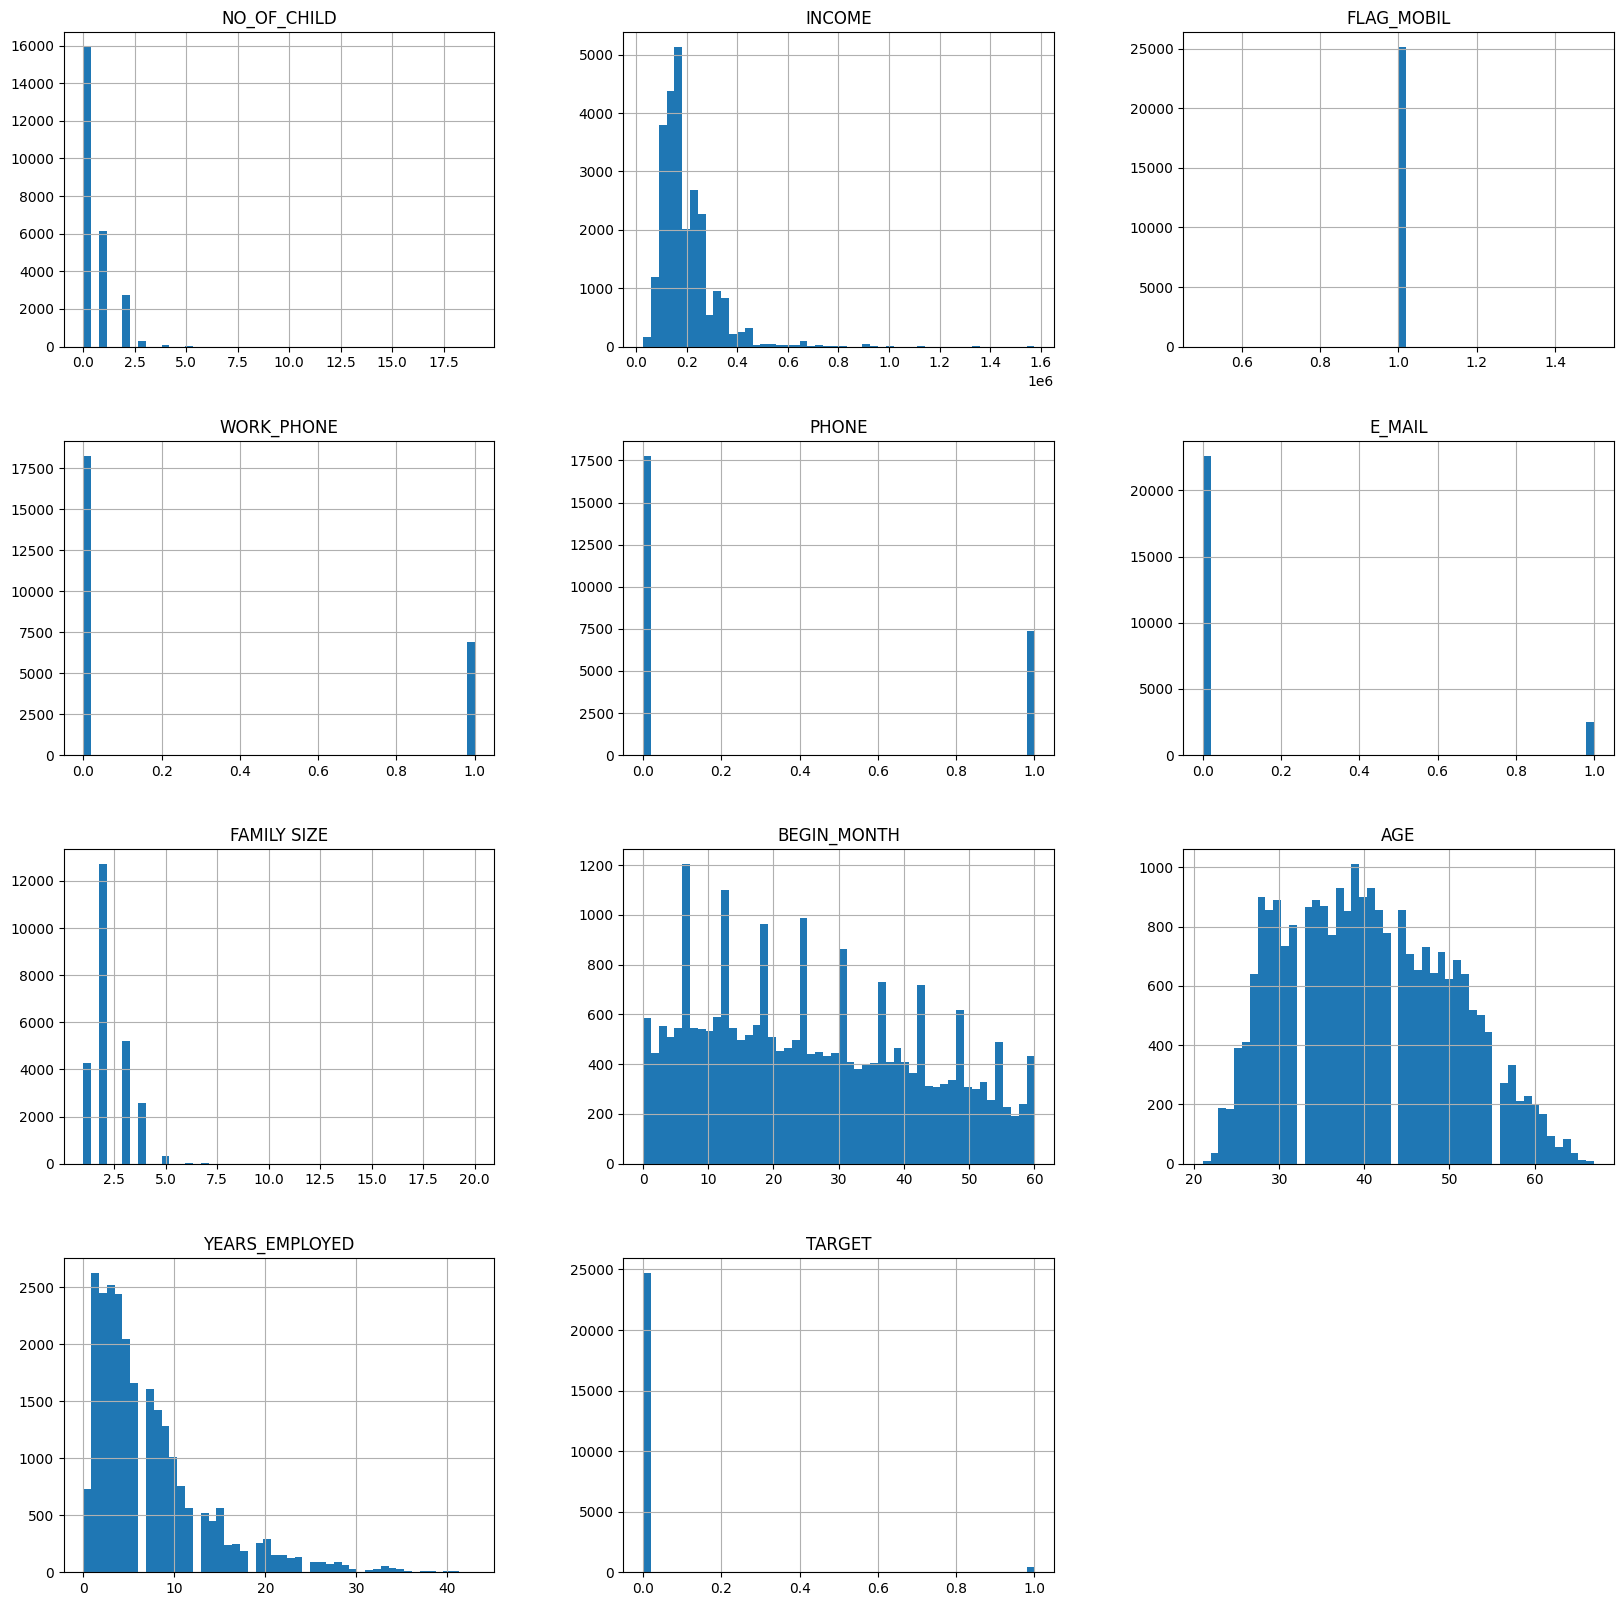

In [3]:
#ToDo: Show histogram of dataframe
df = df.drop(columns=['Unnamed: 0', 'ID'], errors='ignore') # Uneccessary columns
df.hist(figsize=(20, 20), bins=50)
plt.show()

## Data Analysis

In [4]:
# Data analysis
# Todo: analyze your data here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25134 entries, 0 to 25133
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   GENDER          25134 non-null  object 
 1   CAR             25134 non-null  object 
 2   REALITY         25134 non-null  object 
 3   NO_OF_CHILD     25134 non-null  int64  
 4   INCOME          25134 non-null  float64
 5   INCOME_TYPE     25134 non-null  object 
 6   EDUCATION_TYPE  25134 non-null  object 
 7   FAMILY_TYPE     25134 non-null  object 
 8   HOUSE_TYPE      25134 non-null  object 
 9   FLAG_MOBIL      25134 non-null  int64  
 10  WORK_PHONE      25134 non-null  int64  
 11  PHONE           25134 non-null  int64  
 12  E_MAIL          25134 non-null  int64  
 13  FAMILY SIZE     25134 non-null  float64
 14  BEGIN_MONTH     25134 non-null  int64  
 15  AGE             25134 non-null  int64  
 16  YEARS_EMPLOYED  25134 non-null  int64  
 17  TARGET          25134 non-null 

In [5]:
# Kiểm tra dữ liệu khuyết
df.isnull().sum()

GENDER            0
CAR               0
REALITY           0
NO_OF_CHILD       0
INCOME            0
INCOME_TYPE       0
EDUCATION_TYPE    0
FAMILY_TYPE       0
HOUSE_TYPE        0
FLAG_MOBIL        0
WORK_PHONE        0
PHONE             0
E_MAIL            0
FAMILY SIZE       0
BEGIN_MONTH       0
AGE               0
YEARS_EMPLOYED    0
TARGET            0
dtype: int64

In [6]:
# Kiểm tra dữ liệu trùng lặp
df.duplicated().sum()

np.int64(2938)

In [7]:
df.describe().round(2)

,NO_OF_CHILD,INCOME,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
count,25134.00,25134.00,25134.0,25134.00,25134.00,25134.0,25134.00,25134.00,25134.00,25134.00,25134.00
mean,0.51,194833.85,1.0,0.27,0.29,0.1,2.29,26.12,40.54,7.20,0.02
std,0.79,104510.99,0.0,0.45,0.46,0.3,0.95,16.44,9.56,6.41,0.13
min,0.00,27000.00,1.0,0.00,0.00,0.0,1.00,0.00,21.00,0.00,0.00
25%,0.00,135000.00,1.0,0.00,0.00,0.0,2.00,12.00,33.00,3.00,0.00
50%,0.00,180000.00,1.0,0.00,0.00,0.0,2.00,24.00,40.00,5.00,0.00
75%,1.00,225000.00,1.0,1.00,1.00,0.0,3.00,39.00,48.00,10.00,0.00
max,19.00,1575000.00,1.0,1.00,1.00,1.0,20.00,60.00,67.00,43.00,1.00


Unique values in GENDER: ['M' 'F']
Unique values in CAR: ['Y' 'N']
Unique values in REALITY: ['Y' 'N']
Unique values in INCOME_TYPE: ['Working' 'Commercial associate' 'State servant' 'Student' 'Pensioner']
Unique values in EDUCATION_TYPE: ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
Unique values in FAMILY_TYPE: ['Married' 'Single / not married' 'Civil marriage' 'Separated' 'Widow']
Unique values in HOUSE_TYPE: ['House / apartment' 'Rented apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment']


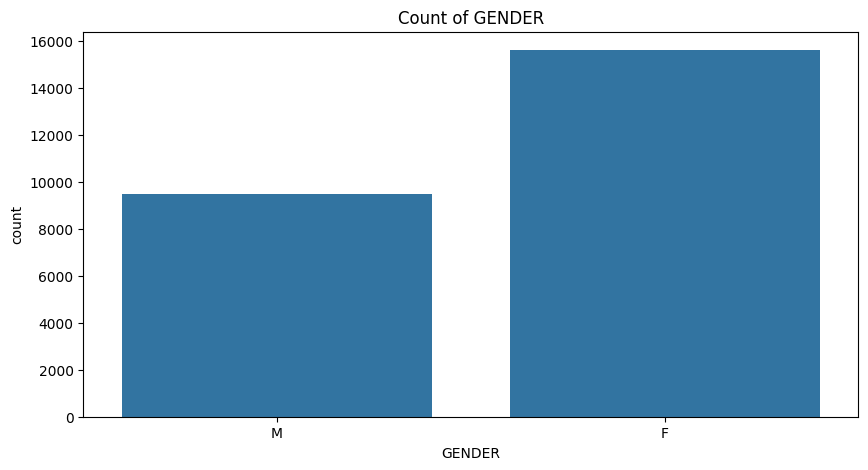

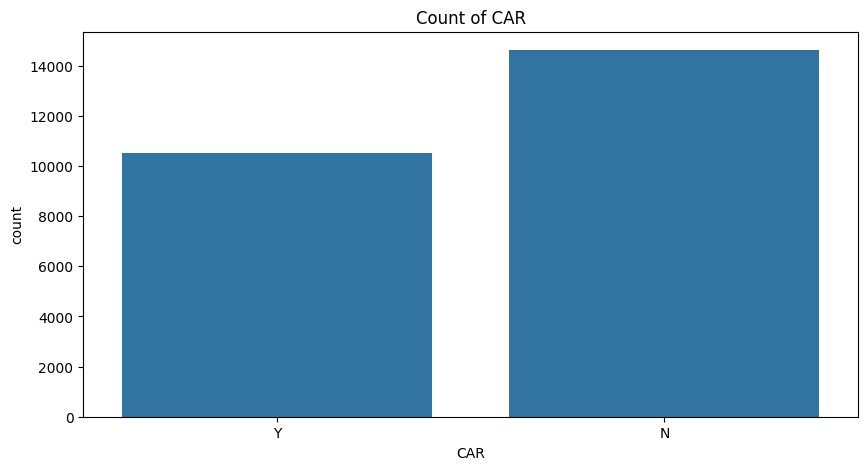

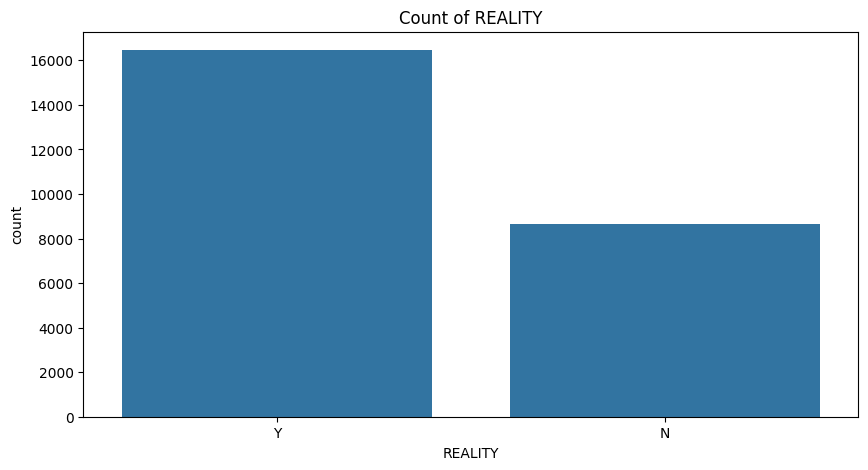

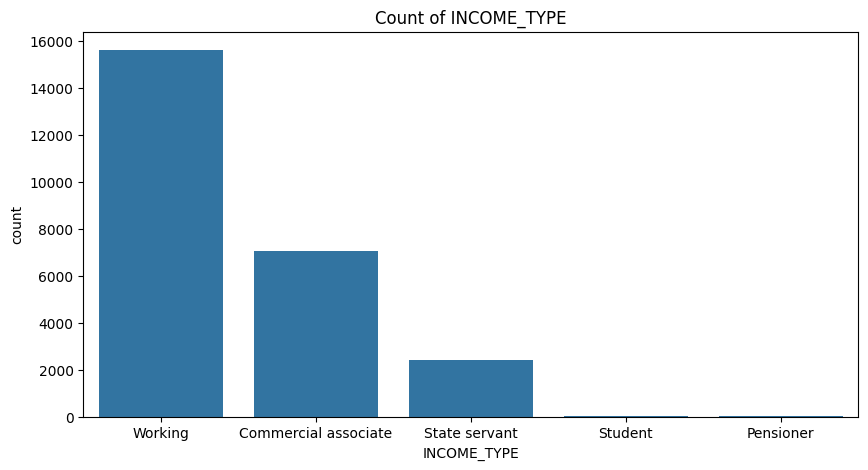

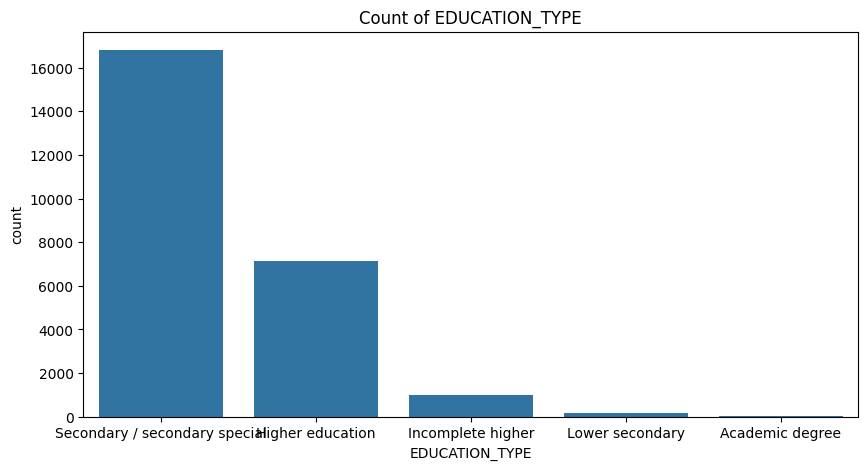

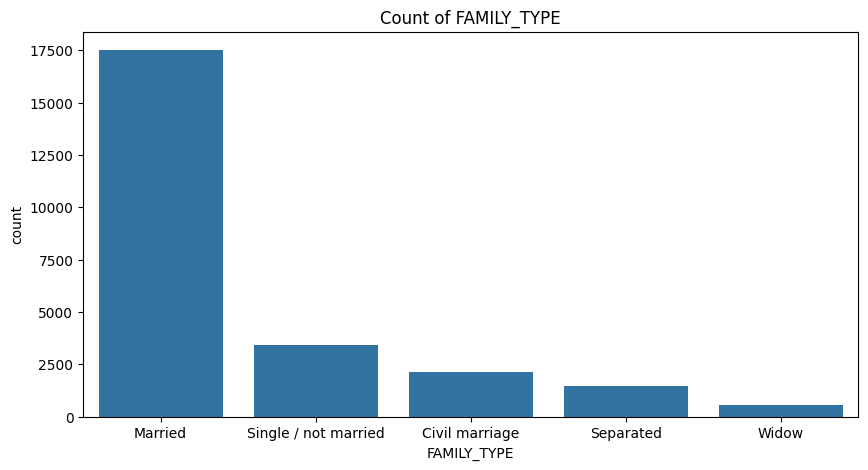

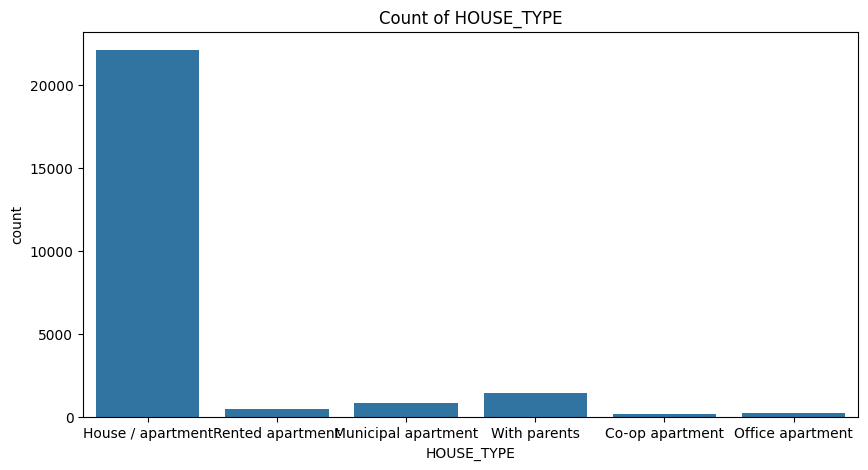

In [8]:
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"Unique values in {col}: {df[col].unique()}")
for i in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=i, data=df)
    plt.title(f"Count of {i}")
    plt.show()

In [9]:
# Percentage distribution of TARGET
print((df['TARGET']
    .value_counts(normalize=True)
    .mul(100)
    .round(2)
    .astype(str) + " %"))

TARGET
0    98.32 %
1     1.68 %
Name: proportion, dtype: object


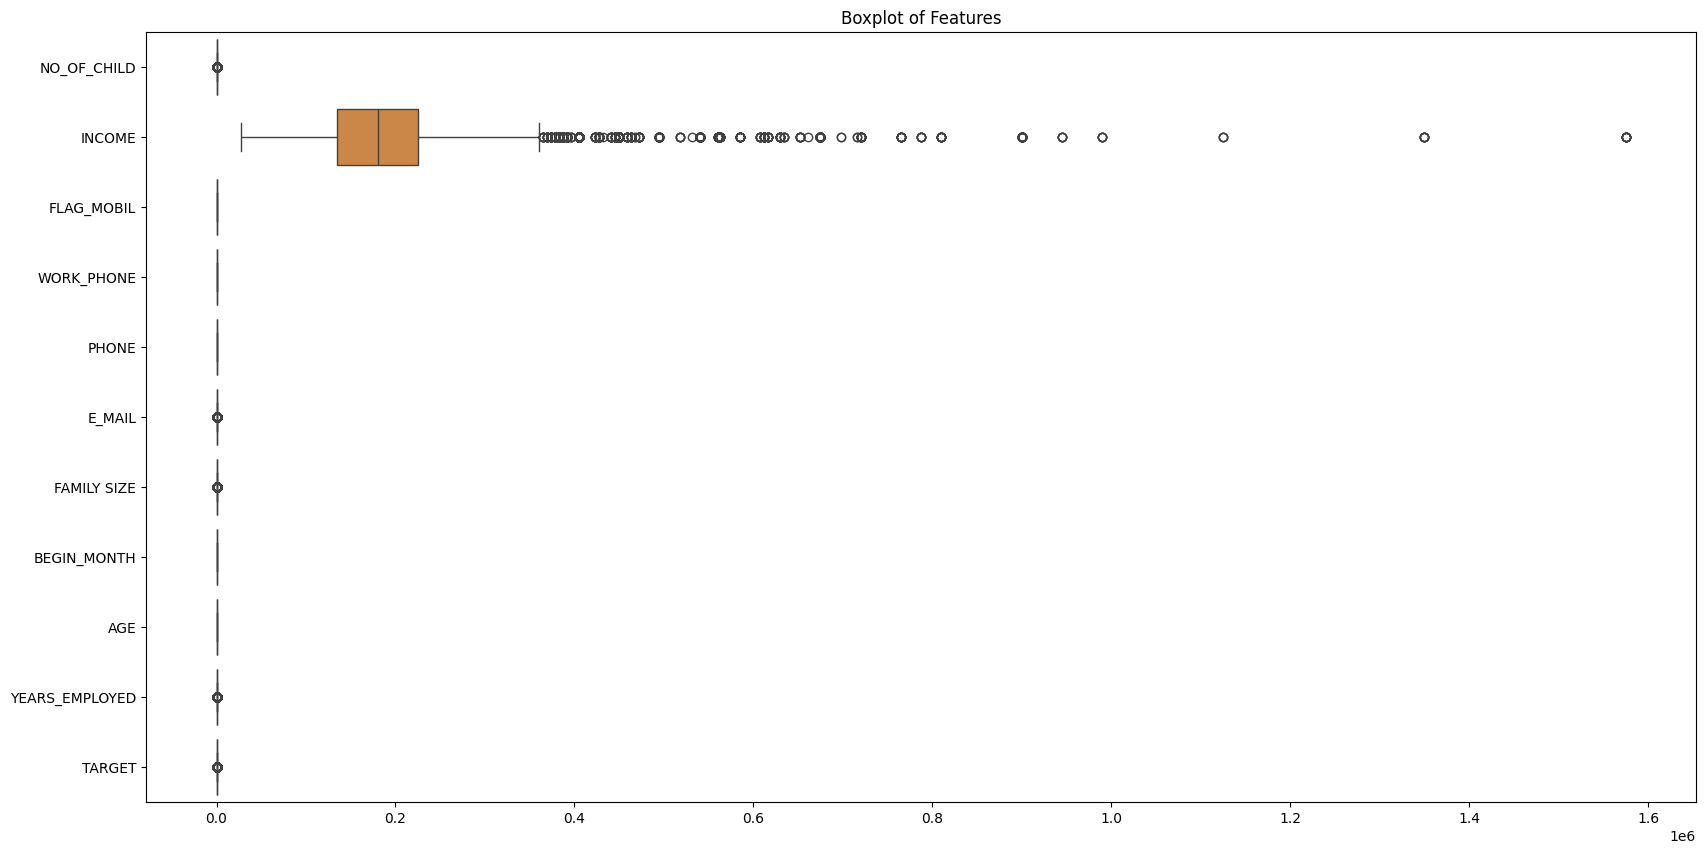

In [10]:
# Plot outliers
plt.figure(figsize=(20, 10))
sns.boxplot(data=df, orient='h')
plt.title("Boxplot of Features")
plt.show()

In [11]:
df[df['TARGET'] == 1].describe().round(4)

,NO_OF_CHILD,INCOME,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
count,422.0000,422.0000,422.0,422.0000,422.0000,422.0000,422.0000,422.0000,422.0000,422.0000,422.0
mean,0.5071,200056.1481,1.0,0.2938,0.3033,0.1019,2.2536,33.7583,39.9597,5.5664,1.0
std,0.7911,102783.0381,0.0,0.4561,0.4602,0.3029,0.9721,15.6078,9.5470,5.1968,0.0
min,0.0000,36000.0000,1.0,0.0000,0.0000,0.0000,1.0000,2.0000,22.0000,0.0000,1.0
25%,0.0000,135000.0000,1.0,0.0000,0.0000,0.0000,2.0000,21.0000,31.0000,2.0000,1.0
50%,0.0000,180000.0000,1.0,0.0000,0.0000,0.0000,2.0000,35.0000,40.0000,4.0000,1.0
75%,1.0000,247500.0000,1.0,1.0000,1.0000,0.0000,3.0000,47.0000,48.0000,8.0000,1.0
max,4.0000,900000.0000,1.0,1.0000,1.0000,1.0000,6.0000,60.0000,62.0000,29.0000,1.0


In [12]:
df[df['TARGET'] == 0].describe().round(4)

,NO_OF_CHILD,INCOME,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
count,24712.0000,2.471200e+04,24712.0,24712.0000,24712.0000,24712.0000,24712.0000,24712.0000,24712.0000,24712.0000,24712.0
mean,0.5124,1.947447e+05,1.0,0.2735,0.2926,0.1006,2.2948,25.9902,40.5460,7.2321,0.0
std,0.7877,1.045400e+05,0.0,0.4457,0.4550,0.3009,0.9472,16.4230,9.5596,6.4295,0.0
min,0.0000,2.700000e+04,1.0,0.0000,0.0000,0.0000,1.0000,0.0000,21.0000,0.0000,0.0
25%,0.0000,1.350000e+05,1.0,0.0000,0.0000,0.0000,2.0000,12.0000,33.0000,3.0000,0.0
50%,0.0000,1.800000e+05,1.0,0.0000,0.0000,0.0000,2.0000,24.0000,40.0000,5.0000,0.0
75%,1.0000,2.250000e+05,1.0,1.0000,1.0000,0.0000,3.0000,39.0000,48.0000,10.0000,0.0
max,19.0000,1.575000e+06,1.0,1.0000,1.0000,1.0000,20.0000,60.0000,67.0000,43.0000,0.0


## Preprocessing

In [13]:
def preprocessing_data(df):
    """
    Preprocess your data (eg. Drop null datapoints or fill missing data)
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: preprocess data
    df = df.drop_duplicates() # Remove duplicate rows

    # Replace outliers in 'INCOME' column based on 'INCOME' column with median
    # Xử lý cho TARGET = 0
    q1_0 = df[df['TARGET'] == 0]['INCOME'].quantile(0.25)
    q3_0 = df[df['TARGET'] == 0]['INCOME'].quantile(0.75)
    iqr_0 = q3_0 - q1_0
    low_0 = q1_0 - 1.5 * iqr_0
    high_0 = q3_0 + 1.5 * iqr_0
    median_0 = df[df['TARGET'] == 0]['INCOME'].median()

    df.loc[(df['TARGET'] == 0) & ((df['INCOME'] < low_0) | (df['INCOME'] > high_0)), 'INCOME'] = median_0

    # TARGET = 1 tương tự:
    q1_1 = df[df['TARGET'] == 1]['INCOME'].quantile(0.25)
    q3_1 = df[df['TARGET'] == 1]['INCOME'].quantile(0.75)
    iqr_1 = q3_1 - q1_1
    low_1 = q1_1 - 1.5 * iqr_1
    high_1 = q3_1 + 1.5 * iqr_1
    median_1 = df[df['TARGET'] == 1]['INCOME'].median()

    df.loc[(df['TARGET'] == 1) & ((df['INCOME'] < low_1) | (df['INCOME'] > high_1)), 'INCOME'] = median_1

    from sklearn.preprocessing import LabelEncoder
    label_encoder = LabelEncoder()
    binary_cols = ['GENDER', 'CAR', 'REALITY']
    for col in binary_cols:
        df[col] = label_encoder.fit_transform(df[col])

    df = pd.get_dummies(df, columns=['INCOME_TYPE', 'EDUCATION_TYPE', 'FAMILY_TYPE', 'HOUSE_TYPE'])
    return df

In [14]:
cleaned_df = preprocessing_data(df.copy())

## Feature Engineering

<Axes: >

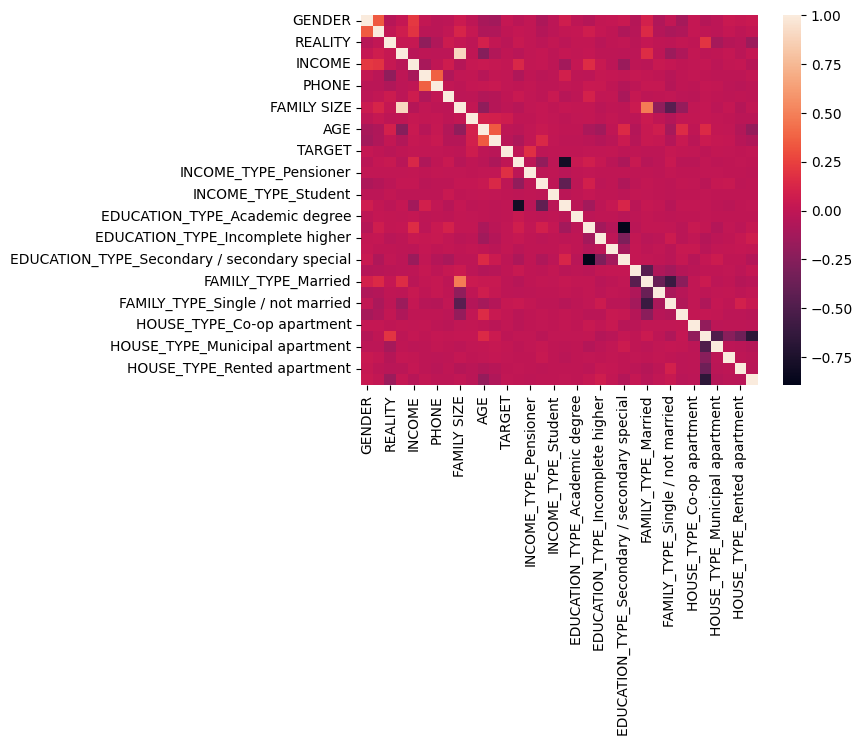

In [15]:
# Heatmap
import seaborn as sns

def apply_feature_engineering(df):
    """
    Apply all feature engineering to transform your data into number
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: Normalize your data
    df = df.drop(columns=['FLAG_MOBIL'], errors='ignore') # Drop FLAG_MOBIL as it is constant

    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    return df

df = apply_feature_engineering(cleaned_df.copy())
sns.heatmap(df.corr()) # Show heatmap after normalized data

In [16]:
def prepare_X_y(df):
    """
    Feature engineering and create X and y
    :param df: pandas dataframe
    :return: (X, y) output feature matrix (dataframe), target (series)
    """
    # Todo: Split data into X and y (using sklearn train_test_split). Return two dataframes
    X = df.drop(columns=['TARGET']) # Todo: Select features
    y = df['TARGET']                # Todo: Select label
    return X, y

X, y = prepare_X_y(df)

# Apply machine learning model

## Train-test split

In [17]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 42
TRAIN_SIZE = 0.7

trainX, testX, trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE, stratify=y)

## Build SK-learn model

In [18]:
# Import libraries
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, precision_recall_curve
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

In [19]:
# Model training and evaluation
def build_model(X, y):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: a model
    """

    # Todo: Input your scaler and logistic model into pipeline
    param_grid = [
        {
            'kernel': ['rbf'],
            'C': [10, 20],
            'gamma': ['scale', 0.1],
            'class_weight': [{0:1, 1:5}, {0:1, 1:10}]
        }
    ]
    # create GridSearchCV and build pipeline
    gridsearch = GridSearchCV(SVC(), param_grid, cv=4, scoring='f1_weighted', n_jobs=-1)
    model = make_pipeline(
        MinMaxScaler(),
        gridsearch
    )
    # Fit your model with X, y
    model.fit(X, y)
    # the gridsearch object holds the best params/scores
    print("Best parameters found: ", gridsearch.best_params_)
    print("Best cross-validation score: ", gridsearch.best_score_)
    return model

def calculate_performance(y_true, y_pred):
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))
    print("\nAccuracy Score:", accuracy_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred, average='weighted'))
    print("Precision Score:", precision_score(y_true, y_pred, average='weighted'))
    print("Recall Score:", recall_score(y_true, y_pred, average='weighted'))
    main_score = f1_score(y_true, y_pred, average='weighted')
    print("\n>> Main Score (F1 Score):")
    return main_score

In [20]:
# Build and train the model
model = build_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(testX)
calculate_performance(testY, pred)  # Todo Input

Best parameters found:  {'C': 20, 'class_weight': {0: 1, 1: 5}, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation score:  0.9744464030805656
Confusion Matrix:
 [[6500   37]
 [ 106   16]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      6537
         1.0       0.30      0.13      0.18       122

    accuracy                           0.98      6659
   macro avg       0.64      0.56      0.59      6659
weighted avg       0.97      0.98      0.97      6659


Accuracy Score: 0.9785253040997147
F1 Score: 0.9743480916576743
Precision Score: 0.9714577810443656
Recall Score: 0.9785253040997147

>> Main Score (F1 Score):


0.9743480916576743

In [21]:
from imblearn.over_sampling import SMOTE

# Over-sampling with SMOTE
trainX_resampled, trainY_resampled = SMOTE(random_state=RANDOM_STATE, k_neighbors=10).fit_resample(trainX, trainY)

In [22]:
print(trainX_resampled.shape, trainY_resampled.shape)

(30502, 33) (30502,)


In [23]:
model_resampled = build_model(trainX_resampled, trainY_resampled)
# Compare on resampled dataset
pred_resampled = model_resampled.predict(testX)
calculate_performance(testY, pred_resampled)  # Todo Input

Best parameters found:  {'C': 20, 'class_weight': {0: 1, 1: 5}, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation score:  0.9296641159731693
Confusion Matrix:
 [[5718  819]
 [  69   53]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.87      0.93      6537
         1.0       0.06      0.43      0.11       122

    accuracy                           0.87      6659
   macro avg       0.52      0.65      0.52      6659
weighted avg       0.97      0.87      0.91      6659


Accuracy Score: 0.8666466436401862
F1 Score: 0.9128982748844645
Precision Score: 0.9710876528582298
Recall Score: 0.8666466436401862

>> Main Score (F1 Score):


0.9128982748844645

In [25]:
def get_conclusion():
    # Todo: Please return your answer, conclusion and opinion right here
    return  "6. " \
            "Other conclusion: " \
            "Bộ dữ liệu mất cân bằng giữa các lớp, với lớp 'TARGET' = 1 chiếm hơn 98% dữ liệu. " \
            "Do lớp 1 quá ít nên việc dự đoán lớp này sẽ khó khăn hơn. " \
            "Thay thế outliers trong cột 'INCOME' bằng giá trị trung vị của lớp tương ứng để giảm ảnh hưởng của các giá trị ngoại lai. " \
            "Main model là SVM với các tham số 'kernel', 'C', 'class_weight' và 'gamma' được điều chỉnh để phù hợp với bộ dữ liệu. " \
            "kernel: 'linear' và 'rbf' được thử nghiệm, với 'C' được điều chỉnh giữa 10 và 20. " \
            "class_weight được điều chỉnh để gia tăng áp lực cho lớp ít xuất hiện. " \
            "Độ chính xác của lớp 0 rất cao nhưng độ chính xác của lớp 1 rất thấp. " \
            "Vì vậy nên cần áp dụng các kỹ thuật cân bằng dữ liệu như SMOTE để tạo ra các mẫu giả mạo cho lớp ít xuất hiện. " \
            "Sau khi áp dụng SMOTE, độ chính xác của việc dự đoán lớp 1 có chút cải thiện nhưng không đáng kể do vẫn còn thiếu nhiều mẫu thực tế. " \
            "Cần thu thập thêm dữ liệu thực tế cho lớp 1 để cho cân bằng bộ dữ liệu. "
conclusion = get_conclusion()
print(conclusion)

6. Other conclusion: Bộ dữ liệu mất cân bằng giữa các lớp, với lớp 'TARGET' = 1 chiếm hơn 98% dữ liệu. Do lớp 1 quá ít nên việc dự đoán lớp này sẽ khó khăn hơn. Thay thế outliers trong cột 'INCOME' bằng giá trị trung vị của lớp tương ứng để giảm ảnh hưởng của các giá trị ngoại lai. Main model là SVM với các tham số 'kernel', 'C', 'class_weight' và 'gamma' được điều chỉnh để phù hợp với bộ dữ liệu. kernel: 'linear' và 'rbf' được thử nghiệm, với 'C' được điều chỉnh giữa 10 và 20. class_weight được điều chỉnh để gia tăng áp lực cho lớp ít xuất hiện. Độ chính xác của lớp 0 rất cao nhưng độ chính xác của lớp 1 rất thấp. Vì vậy nên cần áp dụng các kỹ thuật cân bằng dữ liệu như SMOTE để tạo ra các mẫu giả mạo cho lớp ít xuất hiện. Sau khi áp dụng SMOTE, độ chính xác của việc dự đoán lớp 1 có chút cải thiện nhưng không đáng kể do vẫn còn thiếu nhiều mẫu thực tế. 